<a href="https://colab.research.google.com/github/JamshidbekYusupov/Mohirdev_Tutorial_Codes/blob/main/Second_Version_of_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv"

df = pd.read_csv(url)


In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
df.shape

(768, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Outcome'] = encoder.fit_transform(df['Outcome'].values)

In [14]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome'].copy()

In [44]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X = std_scaler.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_predicted = knn.predict(X_test)

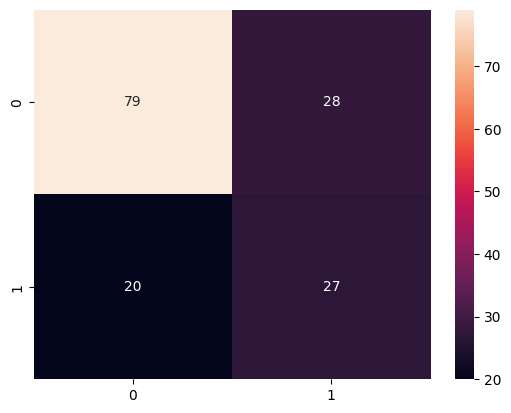

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(confusion_matrix(y_predicted, y_test), annot = True)
plt.show()

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       107
           1       0.49      0.57      0.53        47

    accuracy                           0.69       154
   macro avg       0.64      0.66      0.65       154
weighted avg       0.70      0.69      0.69       154



In [50]:
knn_params = {'n_neighbors':np.arange(1,30)}
knn_grscv = GridSearchCV(knn, knn_params, cv = 5)

In [51]:
knn_grscv.fit(X,y)

knn_grscv.best_params_

{'n_neighbors': 17}

In [52]:
# After finding out the best K, we will, trian our data one more time with k = 14 to make it more accurate

knn2 = KNeighborsClassifier(n_neighbors=17)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [53]:
y_predicted = knn2.predict(X_test)

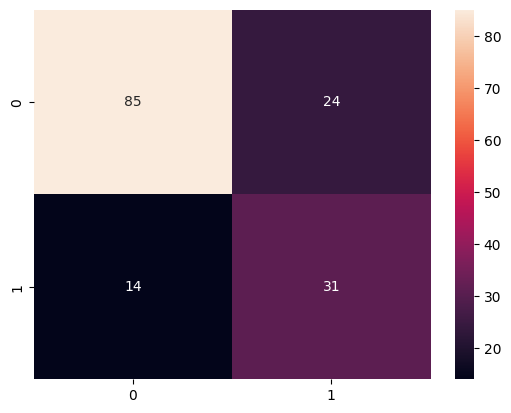

In [54]:
sns.heatmap(confusion_matrix(y_predicted, y_test), annot = True)
plt.show()

In [55]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       109
           1       0.56      0.69      0.62        45

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.77      0.75      0.76       154

